In [374]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt  
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

In [375]:
df = pd.read_csv('Cleaned_Total_Sales.csv')

In [376]:
df.columns

Index(['Year', 'Week', 'Need State', 'Amount'], dtype='object')

In [377]:

df=  df[(df['Need State']== 'Need State 3')]

In [378]:
df

,Year,Week,Need State,Amount
298,2021,1,Need State 3,209473.50
299,2021,2,Need State 3,683112.00
300,2021,3,Need State 3,627825.75
301,2021,4,Need State 3,318566.25
302,2021,5,Need State 3,439665.00
...,...,...,...,...
442,2023,41,Need State 3,121078.50
443,2023,42,Need State 3,377325.75
444,2023,43,Need State 3,19847.25
445,2023,46,Need State 3,0.00


In [379]:
# Here I use the datetime function to convert the week# to an actual date for easy plotting
df['Date'] = pd.to_datetime(df["Year"].astype(str) + "-" + df["Week"].astype(str) + "-1", format='%Y-%U-%w')

In [380]:
df

,Year,Week,Need State,Amount,Date
298,2021,1,Need State 3,209473.50,2021-01-04
299,2021,2,Need State 3,683112.00,2021-01-11
300,2021,3,Need State 3,627825.75,2021-01-18
301,2021,4,Need State 3,318566.25,2021-01-25
302,2021,5,Need State 3,439665.00,2021-02-01
...,...,...,...,...,...
442,2023,41,Need State 3,121078.50,2023-10-09
443,2023,42,Need State 3,377325.75,2023-10-16
444,2023,43,Need State 3,19847.25,2023-10-23
445,2023,46,Need State 3,0.00,2023-11-13


In [381]:
#finding rows with zeros in any column
rows_with_zeros = df[(df == 0).any(axis=1)]
# Remove rows with zeros
df_no_zeros = df[(df != 0).all(axis=1)]
# Checking to make sure rows were removed
df_no_zeros

,Year,Week,Need State,Amount,Date
298,2021,1,Need State 3,209473.50,2021-01-04
299,2021,2,Need State 3,683112.00,2021-01-11
300,2021,3,Need State 3,627825.75,2021-01-18
301,2021,4,Need State 3,318566.25,2021-01-25
302,2021,5,Need State 3,439665.00,2021-02-01
...,...,...,...,...,...
440,2023,39,Need State 3,199078.50,2023-09-25
441,2023,40,Need State 3,301844.25,2023-10-02
442,2023,41,Need State 3,121078.50,2023-10-09
443,2023,42,Need State 3,377325.75,2023-10-16


In [382]:
#bringing it back to df
df=df_no_zeros

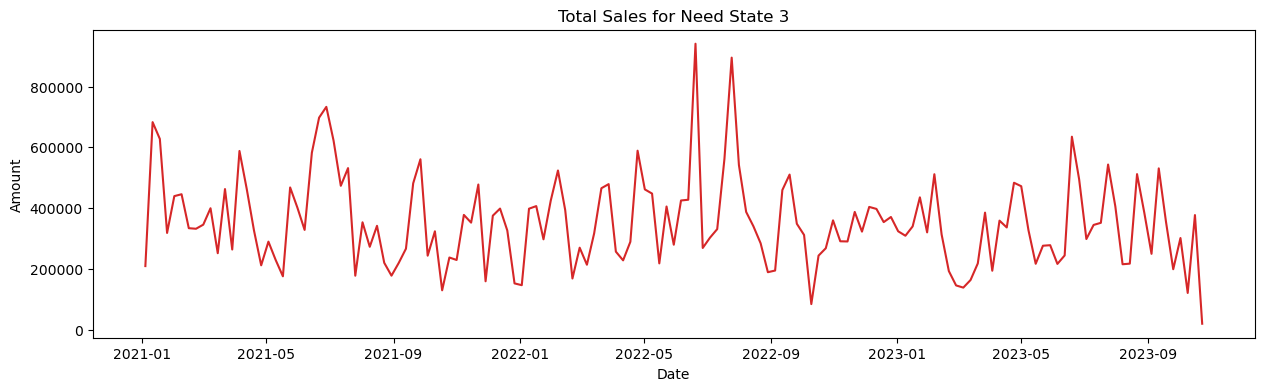

In [383]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Amount', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df['Date'], y=df['Amount'], title='Total Sales for Need State 3')

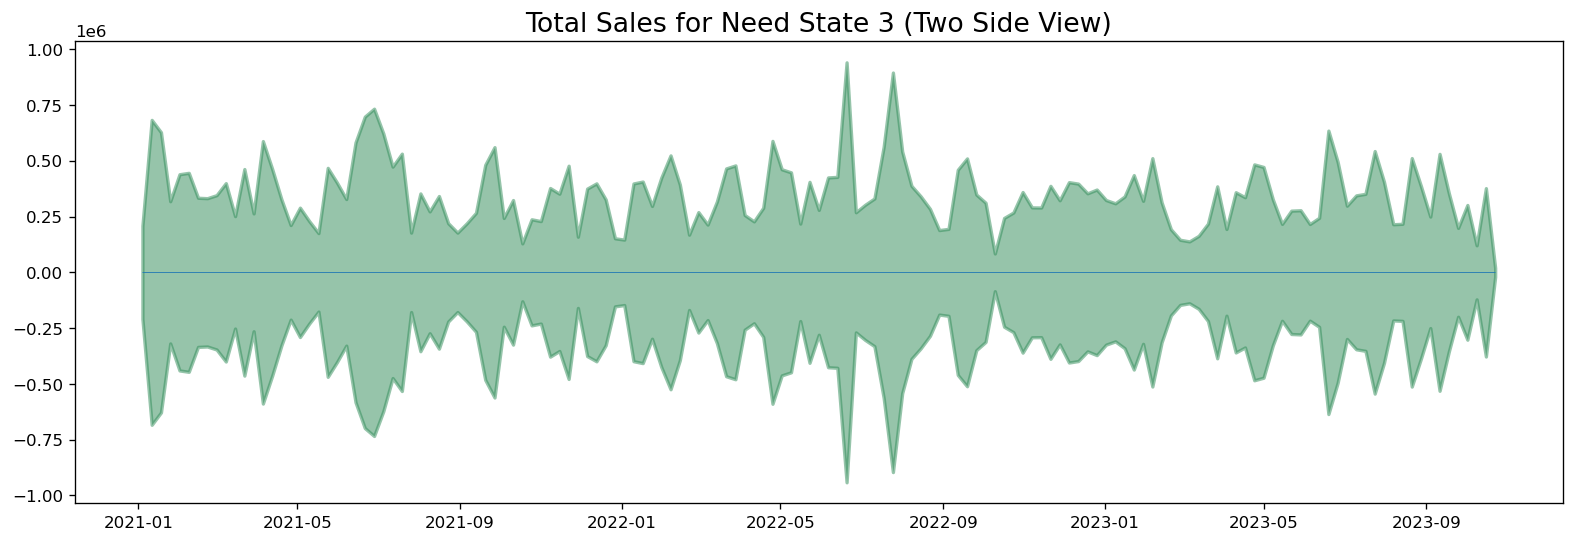

In [384]:
x = df['Date'].values
y1 = df['Amount'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.title('Total Sales for Need State 3 (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['Date']), xmax=np.max(df['Date']), linewidth=.5)
plt.show()

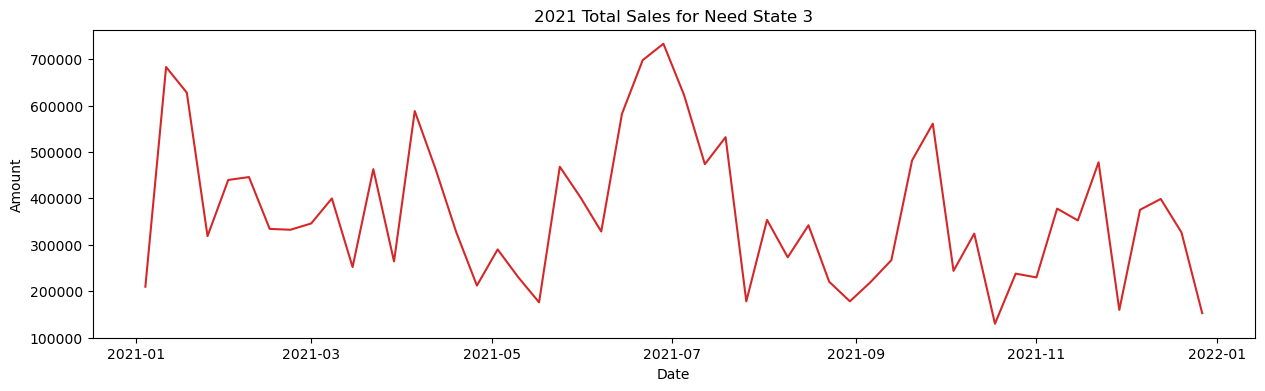

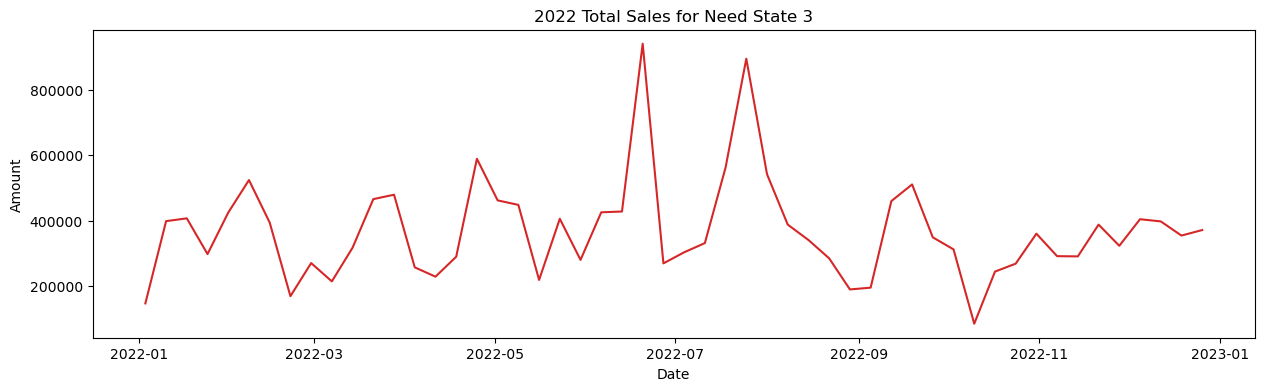

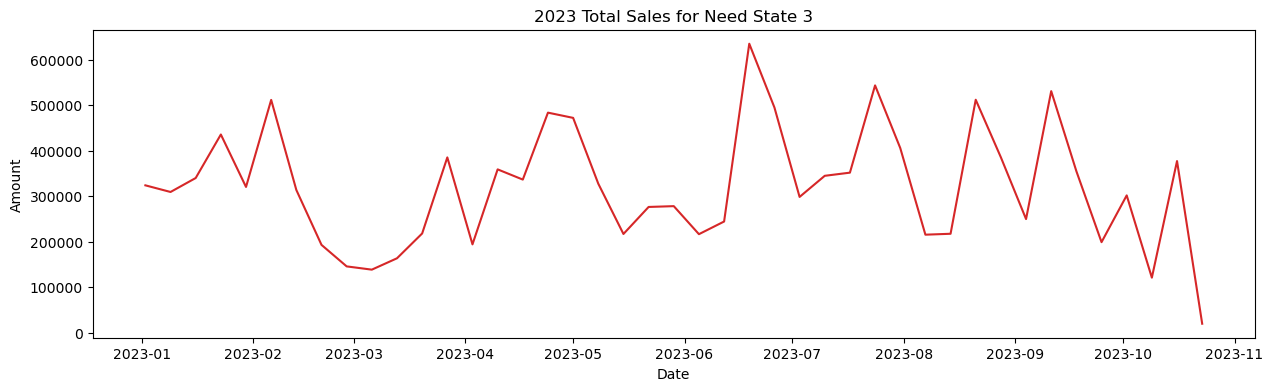

In [385]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Amount', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

# 'Year' column
df_2021 = df[df['Year'] == 2021]
df_2022 = df[df['Year'] == 2022]
df_2023 = df[df['Year'] == 2023]

plot_df(df_2021, x=df_2021['Date'], y=df_2021['Amount'], title='2021 Total Sales for Need State 3')
plot_df(df_2022, x=df_2022['Date'], y=df_2022['Amount'], title='2022 Total Sales for Need State 3')
plot_df(df_2023, x=df_2023['Date'], y=df_2023['Amount'], title='2023 Total Sales for Need State 3')

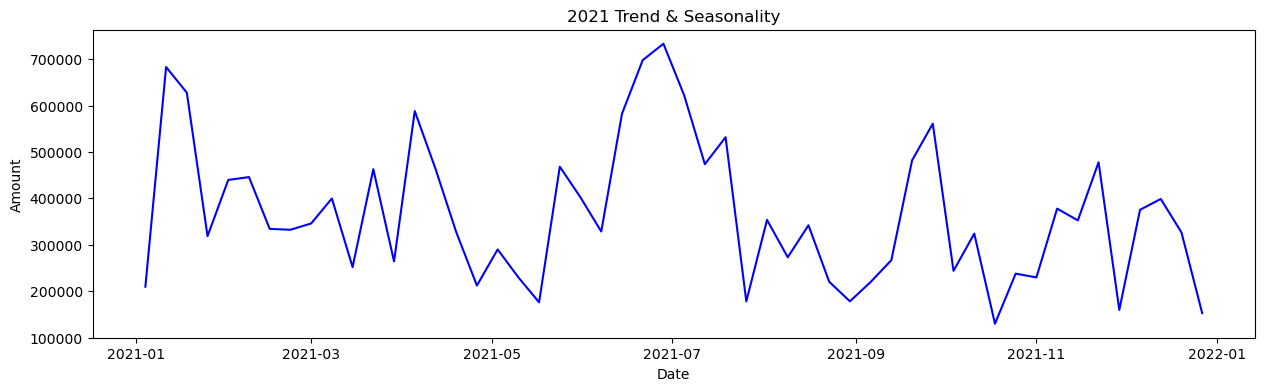

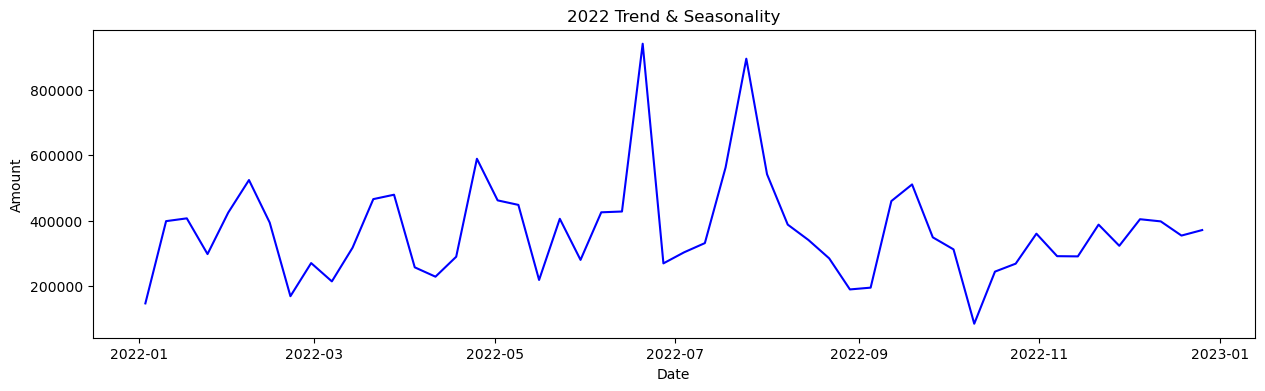

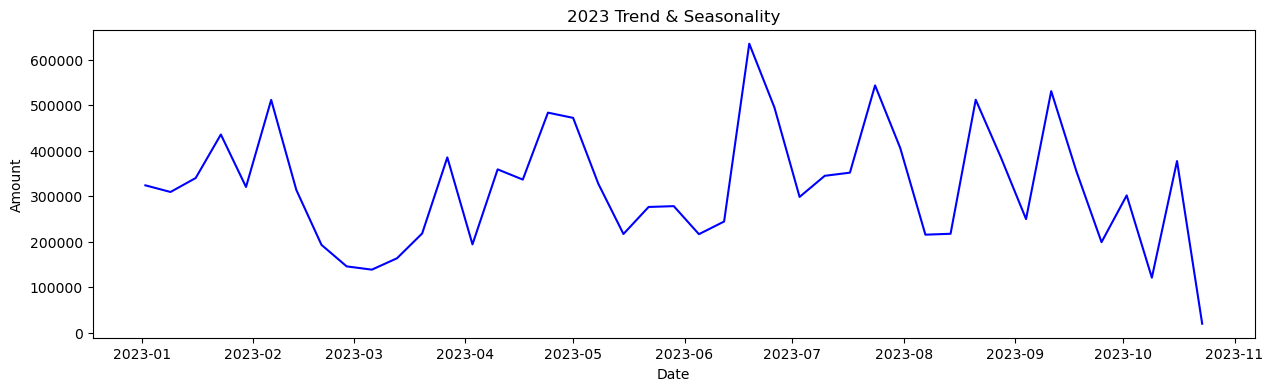

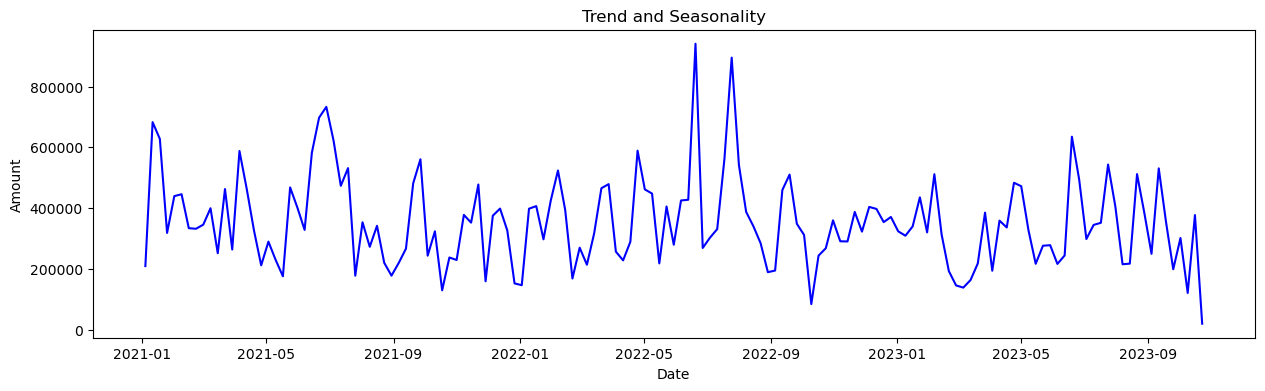

In [386]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Amount', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df_2021, x=df_2021['Date'], y=df_2021['Amount'], title='2021 Trend & Seasonality')
plot_df(df_2022, x=df_2022['Date'], y=df_2022['Amount'], title='2022 Trend & Seasonality')
plot_df(df_2023, x=df_2023['Date'], y=df_2023['Amount'], title='2023 Trend & Seasonality')

plot_df(df, x=df['Date'], y=df['Amount'], title='Trend and Seasonality')


/var/folders/53/rcjzv7_n26jfg34kyhr9sfjw0000gn/T/ipykernel_50323/3238254084.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime if not already
/Users/tyrachung/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/Users/tyrachung/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/Users/tyrachung/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarnin

Root Mean Squared Error (RMSE): 208083.05528205226


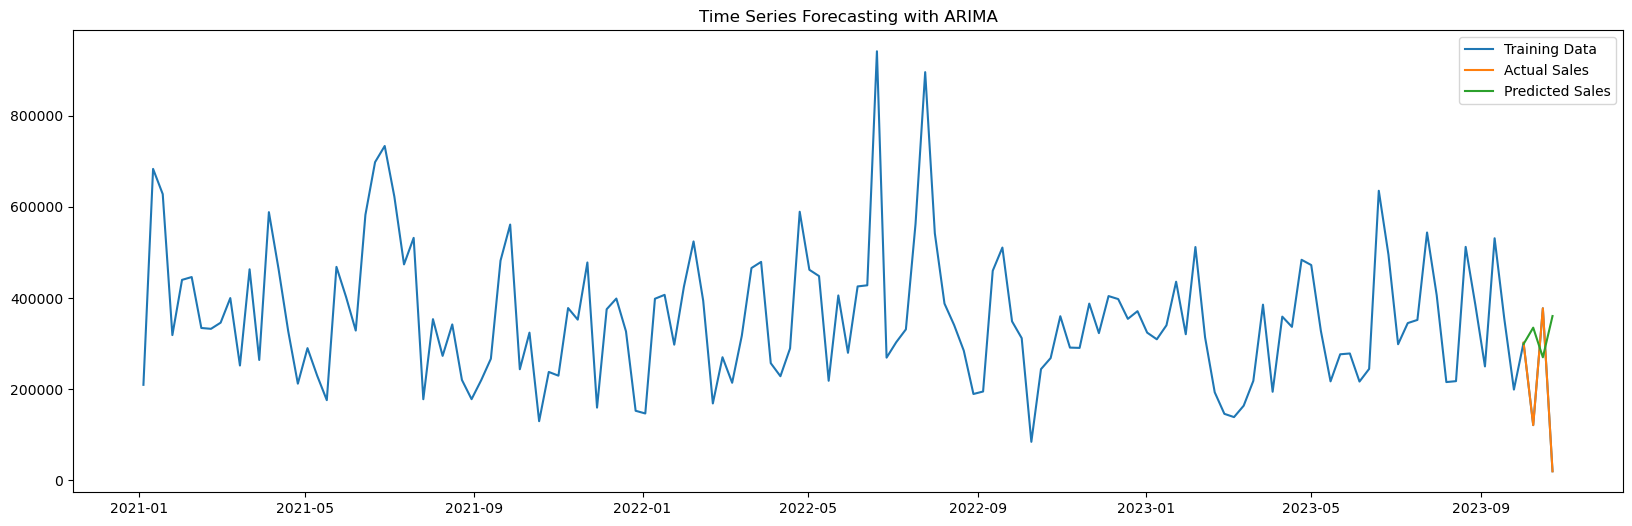

In [387]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with columns 'Date' and 'Amount'
# Make sure 'Date' is in datetime format and 'Amount' is numeric

# Set 'Date' as the index
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime if not already
df = df.set_index('Date')

# Split the data into training and testing sets
train = df[df.index < '2024-01-01']
test = df[(df.index >= '2023-10-01') & (df.index < '2024-01-01')]

# Train the ARIMA model
order = (1, 1, 1)  # You might need to tune these parameters based on your data
model = ARIMA(train['Amount'], order=order)
fit_model = model.fit()

# Make predictions for the test set
predictions = fit_model.predict(start=test.index[0], end=test.index[-1], typ='levels')

# Evaluate the model (optional)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test['Amount'], predictions)
rmse = mse**0.5
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Visualize the results
plt.figure(figsize=(20, 6))
plt.plot(train['Amount'], label='Training Data')
plt.plot(test['Amount'], label='Actual Sales')
plt.plot(predictions, label='Predicted Sales')
plt.legend()
plt.title('Time Series Forecasting with ARIMA')
plt.show()
